In [18]:
# Importing necessary liabraries and settings

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [19]:
# ---------------------------------------------- Importing dataset ----------------------------------------------

pp = pd.read_csv(r"C:\Users\samee\OneDrive\Desktop\Practice files\Airbnb PP Kaggle\train.csv")

In [20]:
# Basic data understading steps

pp.shape

(74111, 30)

In [21]:
pp.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,10009
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",18-06-2016,t,t,NaN,26-03-2012,f,18-07-2016,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,NaN
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,05-08-2017,t,f,100%,19-06-2017,t,23-09-2017,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,NaN
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,30-04-2017,t,t,100%,25-10-2016,t,14-09-2017,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,NaN
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,19-04-2015,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0,NaN
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",12-05-2015,t,t,100%,01-03-2015,t,22-01-2017,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0,NaN


In [22]:
# ---------------------------------------------- Data Cleaning & Preprocessing ----------------------------------------------

selected_cols = ['log_price', 'property_type', 'room_type', 'bathrooms', 'bed_type', 'cleaning_fee', 'city', 'neighbourhood', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds' ]

pp = pp[selected_cols]

#Selected necessary columns to build model

In [23]:
# Handeling nulls

pp.isnull().sum()[pp.isnull().sum() > 0]

bathrooms                 200
neighbourhood            6872
review_scores_rating    16722
bedrooms                   91
beds                      131
dtype: int64

In [24]:
pp.bathrooms.fillna(1.0, inplace = True) # Filled with most frequent value
pp.neighbourhood.fillna('Williamsburg' , inplace = True) # Filled with most frequent entry
pp.review_scores_rating.fillna(pp.review_scores_rating.mean().round(2), inplace = True) # Filled with mean rating
pp.beds.fillna(1.0, inplace = True) # Filled with most frequent value
pp.bedrooms.fillna(1.0, inplace = True) # Filled with most frequent value

In [25]:
pp.shape

#Final data shape with no nulls and dropped unnecessary cols

(74111, 12)

In [26]:
# Converting values to numeric

pp.select_dtypes(include = 'object').columns

Index(['property_type', 'room_type', 'bed_type', 'city', 'neighbourhood'], dtype='object')

In [27]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

pp[pp.select_dtypes(include = ('object', 'bool')).columns] = pp[pp.select_dtypes(include = ('object', 'bool')).columns].apply(le.fit_transform)

# Converting all object values to numbers

In [28]:
# Final data

pp.head()

,log_price,property_type,room_type,bathrooms,bed_type,cleaning_fee,city,neighbourhood,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.010635,0,0,1.0,4,1,4,77,2,100.00,1.0,1.0
1,5.129899,0,0,1.0,4,1,4,252,6,93.00,3.0,3.0
2,4.976734,0,0,1.0,4,1,4,247,10,92.00,1.0,3.0
3,6.620073,17,0,1.0,4,1,5,325,0,94.07,2.0,2.0
4,4.744932,0,0,1.0,4,1,2,119,4,40.00,0.0,1.0


In [29]:
pd.DataFrame(pp.corr().round(2))

# Finding if we have any col with no reation with Target variable

,log_price,property_type,room_type,bathrooms,bed_type,cleaning_fee,city,neighbourhood,number_of_reviews,review_scores_rating,bedrooms,beds
log_price,1.00,0.05,-0.61,0.36,0.09,0.11,0.03,0.04,-0.03,0.07,0.47,0.44
property_type,0.05,1.00,0.08,0.26,0.01,0.04,-0.10,0.06,0.04,0.05,0.22,0.18
room_type,-0.61,0.08,1.00,-0.12,-0.15,-0.21,0.06,-0.01,-0.03,-0.04,-0.24,-0.32
bathrooms,0.36,0.26,-0.12,1.00,0.04,0.05,-0.08,0.03,-0.04,0.01,0.59,0.53
bed_type,0.09,0.01,-0.15,0.04,1.00,0.03,0.01,0.01,0.01,0.00,0.05,0.07
cleaning_fee,0.11,0.04,-0.21,0.05,0.03,1.00,-0.02,0.02,0.11,0.03,0.11,0.13
city,0.03,-0.10,0.06,-0.08,0.01,-0.02,1.00,-0.04,-0.02,-0.02,-0.07,-0.07
neighbourhood,0.04,0.06,-0.01,0.03,0.01,0.02,-0.04,1.00,-0.01,0.01,0.01,0.02
number_of_reviews,-0.03,0.04,-0.03,-0.04,0.01,0.11,-0.02,-0.01,1.00,0.01,-0.04,0.03
review_scores_rating,0.07,0.05,-0.04,0.01,0.00,0.03,-0.02,0.01,0.01,1.00,0.01,-0.02


In [30]:
#Train test split

from sklearn.model_selection import train_test_split

pp_train, pp_test = train_test_split(pp, test_size = 0.2)

#Spliting into X and Y

pp_train_x = pp_train.drop('log_price', axis = 1)
pp_train_y = pp_train.log_price

pp_test_x = pp_test.drop('log_price', axis = 1)
pp_test_y = pp_test.log_price

In [31]:
# ---------------------------------------------- Exploratory Data Analysis (EDA) ----------------------------------------------

df0 = pd.read_csv(r"C:\Users\samee\OneDrive\Desktop\Practice files\Airbnb PP Kaggle\train.csv")
df0.log_price = np.exp(df0.log_price)

df = pd.DataFrame()
df = df0.groupby('property_type').log_price.max().round(2)
df = df.sort_values(ascending = False).head(10)

df1 = pd.DataFrame()
df1 = df0.groupby('review_scores_rating').log_price.mean()
df1 = df1.sort_values(ascending = False).head(10)

df2 = pd.DataFrame()
df2 = df0.groupby('room_type').log_price.max().round(2)
df2 = df2.sort_values(ascending = False)

In [32]:
df0.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [33]:
print(df2)

room_type
Entire home/apt    1999.0
Private room       1995.0
Shared room        1500.0
Name: log_price, dtype: float64


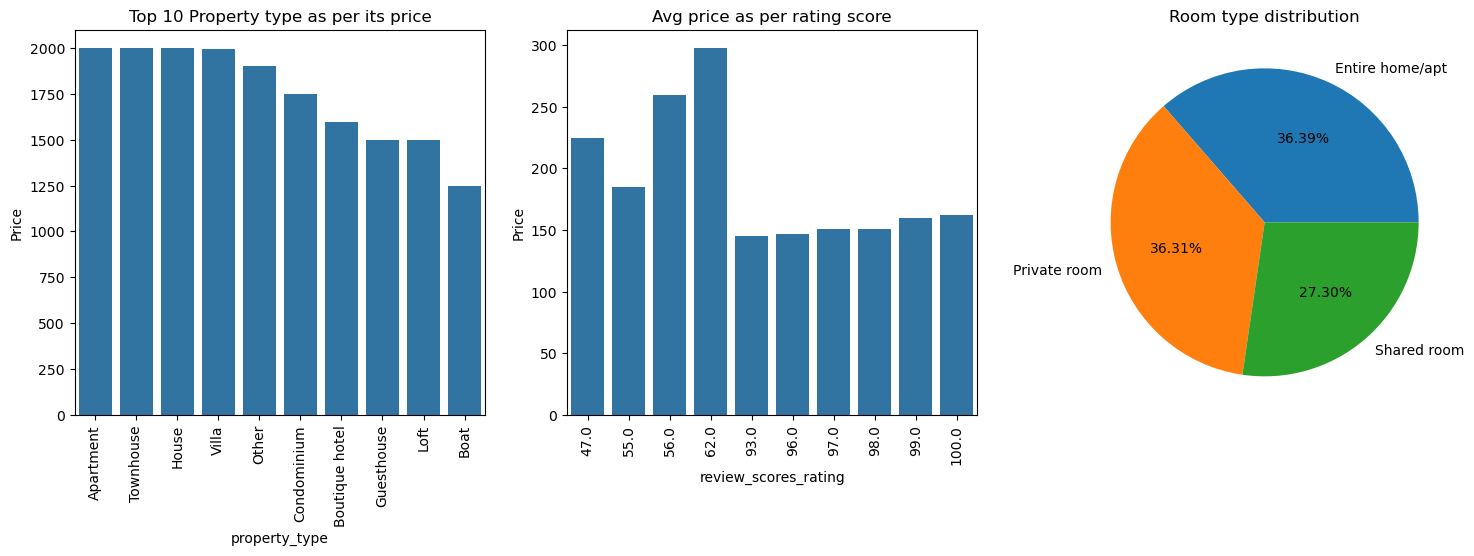

In [34]:
plt.figure(figsize = (18,5))

plt.subplot(1,3,1)
sns.barplot(df)
plt.xticks(rotation = 90)
plt.ylabel('Price')
plt.title('Top 10 Property type as per its price');

plt.subplot(1,3,2)
sns.barplot(df1)
plt.xticks(rotation = 90)
plt.ylabel('Price')
plt.title('Avg price as per rating score');

plt.subplot(1,3,3)
plt.title('Room type distribution');
plt.pie(df2, labels = df2.index, autopct = '%1.2f%%' );

plt.show()

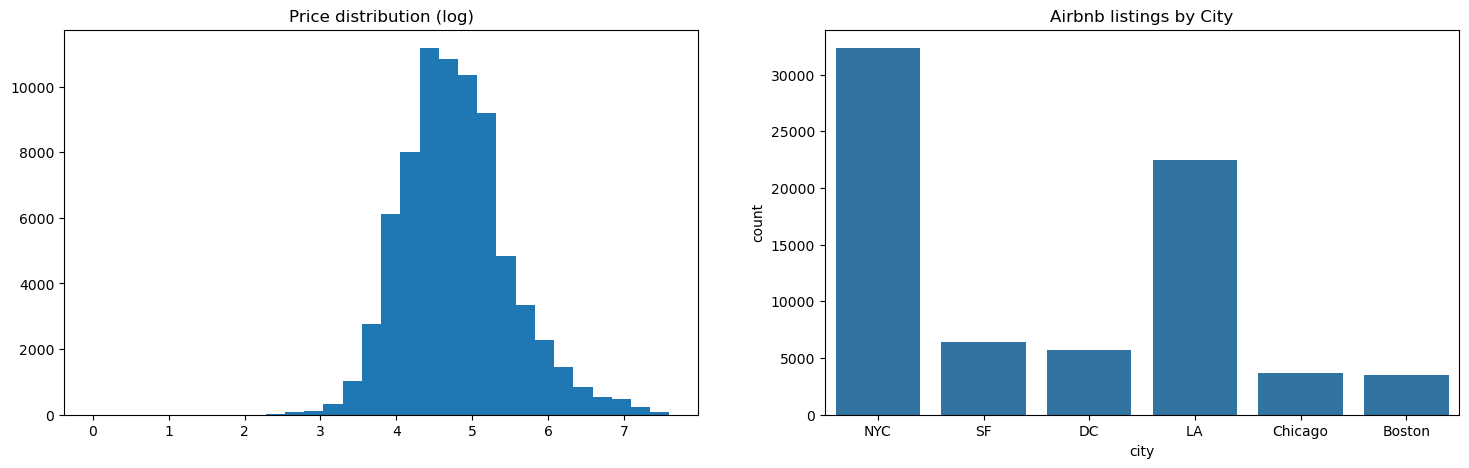

In [35]:
plt.figure(figsize=(18, 5))

# Histogram
plt.subplot(1, 2, 1)
plt.title('Price distribution (log)')
plt.hist(pp.log_price, bins=30)

# Count of listings per city
plt.subplot(1, 2, 2)
plt.title('Airbnb listings by City')
sns.countplot(x = df0.city)

plt.show()

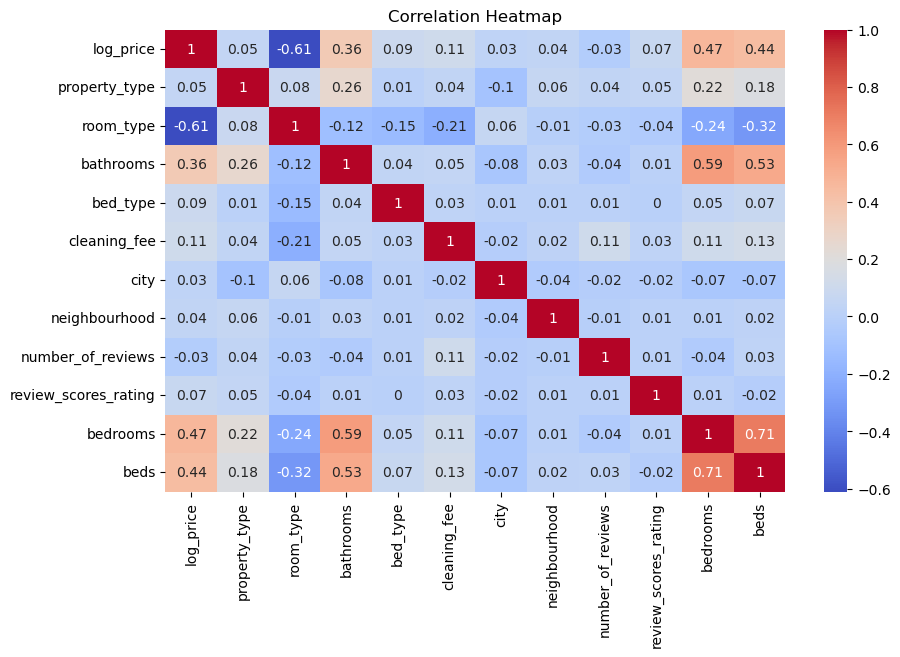

In [36]:
#Heatmap

plt.figure(figsize = (10,6))

sns.heatmap(pp.corr().round(2), annot = True, cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.show()

In [37]:
# With above analysis, we've found top 10 property type and its max price, average price of hotel based on ratings, room type distribution,
# Also heatmap is plotted to find co-relations between selected columns for better understanding. 
# Price distribution (Histogram) is plotted to find spread of Y variable and to find outliers 

In [38]:
# ---------------------------------------------- MODEL BUILDING ----------------------------------------------

In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linreg = LinearRegression()
linreg.fit(pp_train_x, pp_train_y)

# Prediction on Train and Test
y_pred_train = linreg.predict(pp_train_x)
y_pred_test = linreg.predict(pp_test_x)

# Checking performance
print("Train R²:", r2_score(pp_train_y, y_pred_train))
print("Test R²:", r2_score(pp_test_y, y_pred_test))
print("Test RMSE:", np.sqrt(mean_squared_error(pp_test_y, y_pred_test)))

#Train and Test are performing silimar, so good to go

Train R²: 0.5023676589183239
Test R²: 0.5061944750206073
Test RMSE: 0.45642013676609045


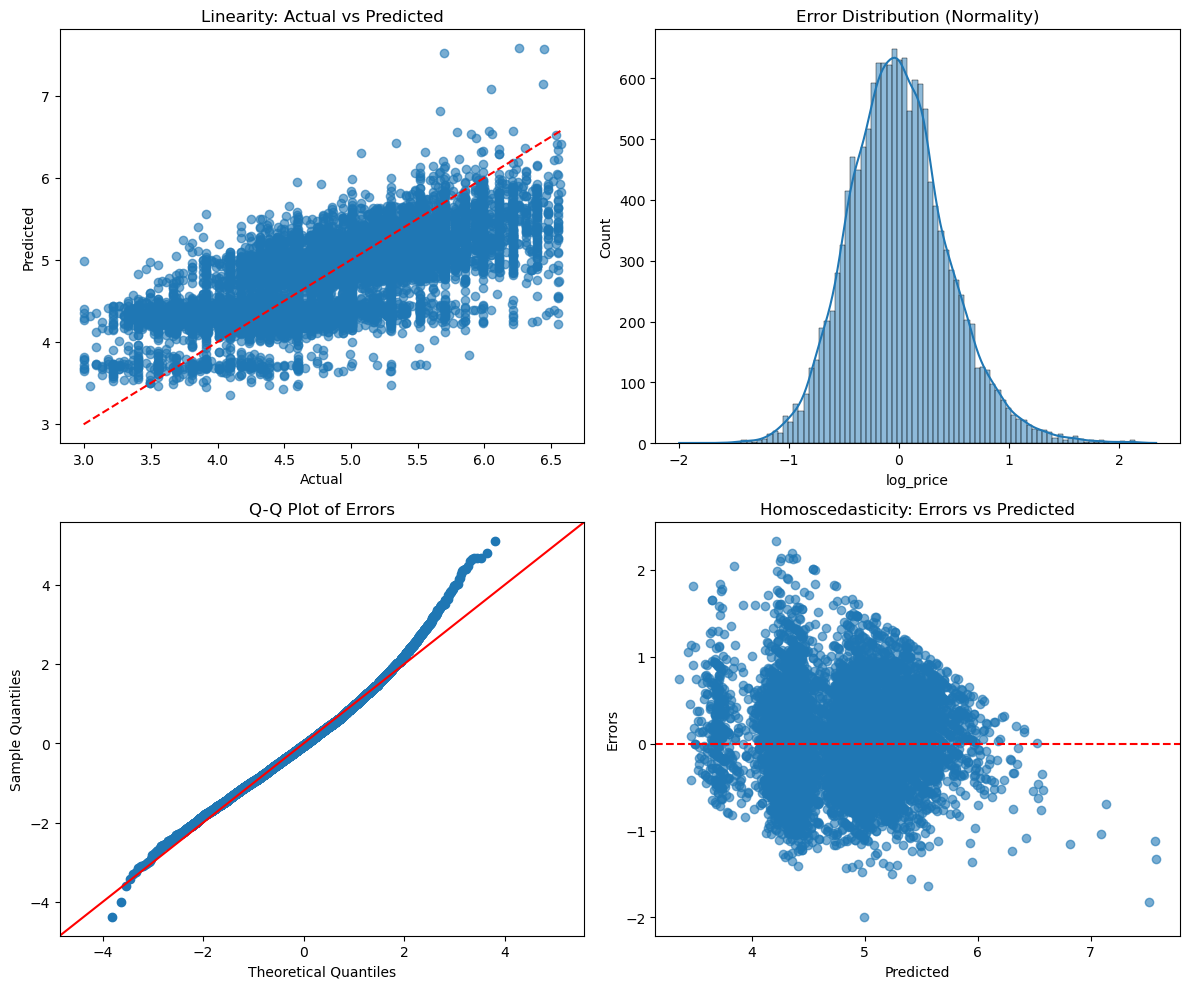

Durbin-Watson Statistic: 2.0032485641833326


In [148]:
# Checking assumptions

import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Errors (residuals)
errors = pp_test_y - y_pred_test

# Subplots grid: 2 rows × 2 cols
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# ------------------------------------
# 1. Linearity (Actual vs Predicted)
# ------------------------------------
axes[0,0].scatter(pp_test_y, y_pred_test, alpha=0.6)
axes[0,0].plot([pp_test_y.min(), pp_test_y.max()],
               [pp_test_y.min(), pp_test_y.max()],
               "r--")
axes[0,0].set_xlabel("Actual")
axes[0,0].set_ylabel("Predicted")
axes[0,0].set_title("Linearity: Actual vs Predicted")

# ------------------------------------
# 2. Normality of Errors (Histogram)
# ------------------------------------
sns.histplot(errors, kde=True, ax=axes[0,1])
axes[0,1].set_title("Error Distribution (Normality)")

# ------------------------------------
# 3. Q-Q Plot of Errors
# ------------------------------------
sm.qqplot(errors, line="45", fit=True, ax=axes[1,0])
axes[1,0].set_title("Q-Q Plot of Errors")

# ------------------------------------
# 4. Homoscedasticity (Errors vs Predicted)
# ------------------------------------
axes[1,1].scatter(y_pred_test, errors, alpha=0.6)
axes[1,1].axhline(y=0, color="r", linestyle="--")
axes[1,1].set_xlabel("Predicted")
axes[1,1].set_ylabel("Errors")
axes[1,1].set_title("Homoscedasticity: Errors vs Predicted")

plt.tight_layout()
plt.show()

# ------------------------------------
# Independence of Errors (Durbin-Watson)
# ------------------------------------
dw_stat = durbin_watson(errors)
print("Durbin-Watson Statistic:", dw_stat)

In [149]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# ------------------------------
# 1. VIF Check
# ------------------------------
X_const = sm.add_constant(pp_train_x)  # add intercept for statsmodels
vif = pd.DataFrame()
vif["Feature"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
print("VIF Results:\n", vif)

# ------------------------------
# 2. Regularization Models
# ------------------------------
# Ridge
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(pp_train_x, pp_train_y)
ridge_pred = ridge.predict(pp_test_x)
print("\nRidge R²:", r2_score(pp_test_y, ridge_pred))
print("Ridge RMSE:", np.sqrt(mean_squared_error(pp_test_y, ridge_pred)))

# Lasso
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(pp_train_x, pp_train_y)
lasso_pred = lasso.predict(pp_test_x)
print("\nLasso R²:", r2_score(pp_test_y, lasso_pred))
print("Lasso RMSE:", np.sqrt(mean_squared_error(pp_test_y, lasso_pred)))

# ------------------------------
# 3. Tree-based Models
# ------------------------------
# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(pp_train_x, pp_train_y)
rf_pred = rf.predict(pp_test_x)
print("\nRandom Forest R²:", r2_score(pp_test_y, rf_pred))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(pp_test_y, rf_pred)))

VIF Results:
                  Feature         VIF
0                  const  298.290278
1          property_type    1.108904
2              room_type    1.218266
3              bathrooms    1.481988
4               bed_type    1.024955
5           cleaning_fee    1.066724
6                   city    1.019298
7          neighbourhood    1.007160
8      number_of_reviews    1.022722
9   review_scores_rating    1.008320
10              bedrooms    2.160748
11                  beds    2.111319

Ridge R²: 0.5061939915500052
Ridge RMSE: 0.45642036019986465

Lasso R²: 0.5037028468564866
Lasso RMSE: 0.4575701829573753

Random Forest R²: 0.6024214345756762
Random Forest RMSE: 0.409541866772843


In [160]:
import pandas as pd

results = {
    "Model": ["Linear", "Ridge", "Lasso", "Random Forest"],
    "R²": [
        r2_score(pp_test_y, y_pred_test),        # Linear
        r2_score(pp_test_y, ridge_pred),         # Ridge
        r2_score(pp_test_y, lasso_pred),         # Lasso
        r2_score(pp_test_y, rf_pred),            # RF
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(pp_test_y, y_pred_test)),
        np.sqrt(mean_squared_error(pp_test_y, ridge_pred)),
        np.sqrt(mean_squared_error(pp_test_y, lasso_pred)),
        np.sqrt(mean_squared_error(pp_test_y, rf_pred)),
    ]
}

results_df = pd.DataFrame(results)
print(results_df)


           Model        R²      RMSE
0         Linear  0.506194  0.456420
1          Ridge  0.506194  0.456420
2          Lasso  0.503703  0.457570
3  Random Forest  0.602421  0.409542


In [152]:
from sklearn.model_selection import GridSearchCV

# Random Forest tuning
rf_params = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42),
                       param_grid=rf_params,
                       scoring="r2",
                       cv=3,
                       n_jobs=-1)
rf_grid.fit(pp_train_x, pp_train_y)
print("Best RF Params:", rf_grid.best_params_)
print("Best RF R²:", rf_grid.best_score_)


Best RF Params: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best RF R²: 0.6175045627014814


In [153]:
# Retrain Random Forest with best params
best_rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
best_rf.fit(pp_train_x, pp_train_y)
rf_final_pred = best_rf.predict(pp_test_x)
print("Final RF Test R²:", r2_score(pp_test_y, rf_final_pred))
print("Final RF Test RMSE:", np.sqrt(mean_squared_error(pp_test_y, rf_final_pred)))


Final RF Test R²: 0.6293248447538107
Final RF Test RMSE: 0.395442700657492


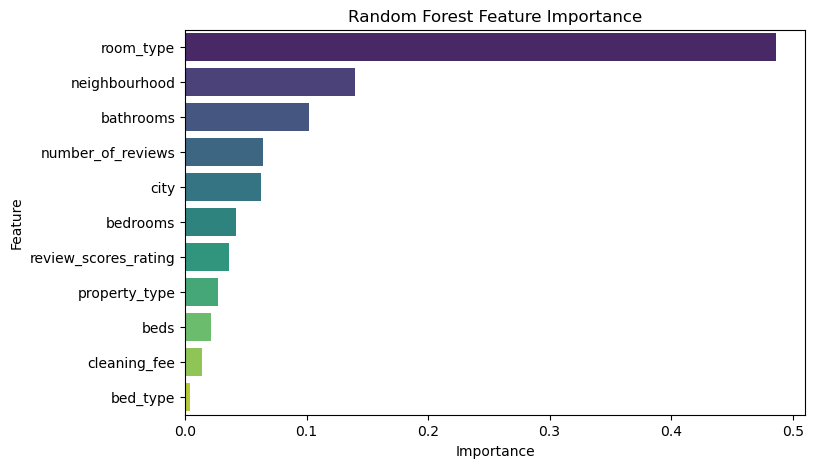

In [154]:
# Random Forest Feature Importance
rf_importances = pd.Series(best_rf.feature_importances_, index=pp_train_x.columns)
rf_importances = rf_importances.sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=rf_importances.values, y=rf_importances.index, palette="viridis")
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


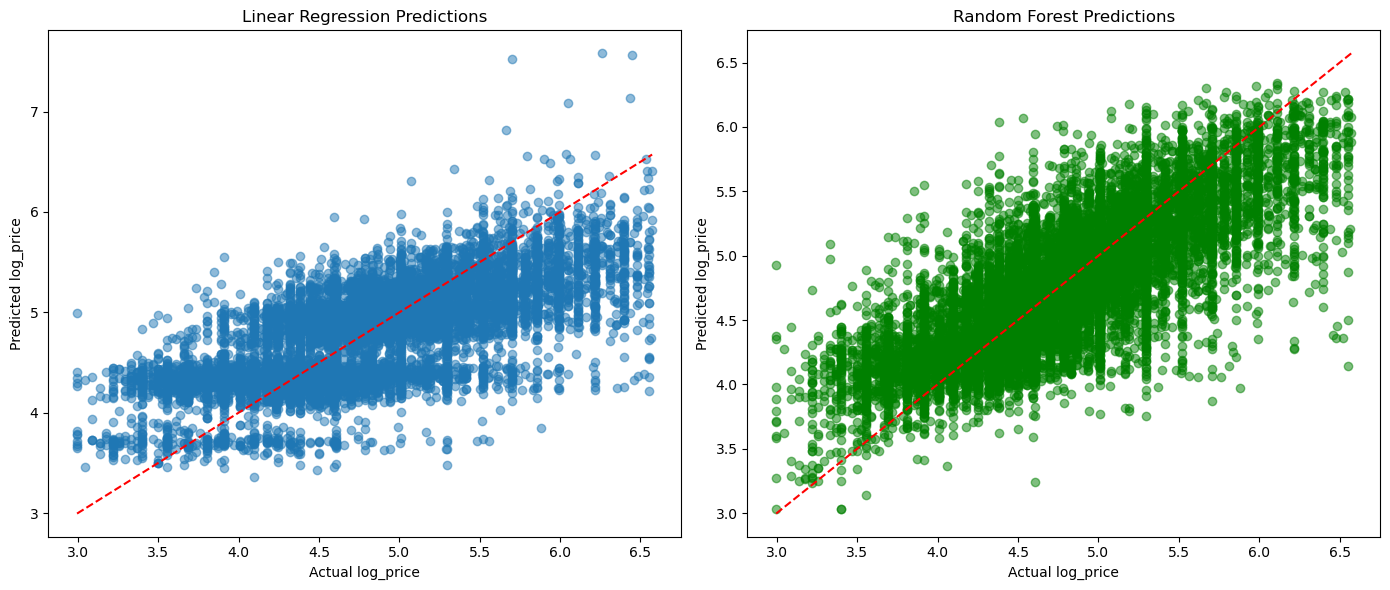

In [162]:
# Actual values
y_true = pp_test_y.values

# Predictions from Linear Regression
y_pred_lin = y_pred_test  

# Predictions from best Random Forest
y_pred_rf = rf_final_pred  

# Create comparison plots
plt.figure(figsize=(14,6))

# Linear Regression predictions
plt.subplot(1,2,1)
plt.scatter(y_true, y_pred_lin, alpha=0.5)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
plt.xlabel("Actual log_price")
plt.ylabel("Predicted log_price")
plt.title("Linear Regression Predictions")

# Random Forest predictions
plt.subplot(1,2,2)
plt.scatter(y_true, y_pred_rf, alpha=0.5, color="green")
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
plt.xlabel("Actual log_price")
plt.ylabel("Predicted log_price")
plt.title("Random Forest Predictions")

plt.tight_layout()
plt.show()


In [ ]:
# “The red dashed line represents perfect predictions (Actual = Predicted).
# In the Linear Regression plot, points are more scattered away from the line, showing the model struggles with complex patterns.
# In the Random Forest plot, points align much closer to the line, meaning it captures the non-linear structure of Airbnb pricing better.”

In [ ]:
# My Airbnb Regression Project

# “I started by importing Python libraries for data manipulation and visualization, and set display settings for better readability.”
# “I loaded the Airbnb dataset into a pandas DataFrame for analysis.”
# “I checked the dataset size to understand how many rows and columns we’re working with.”
# “I looked at the first few rows to get a sense of the data and features.”
# “I selected the most important columns that influence Airbnb prices, such as property type, room type, bathrooms, bedrooms, city, and reviews.”
# “I checked for missing values in the dataset before preprocessing.”
# “I handled missing values by replacing them with either the most frequent entry (mode) or the mean (for ratings).”
# “I checked dataset shape again to ensure data integrity after cleaning.”
# “I identified categorical features (like property type, room type, city) that will need encoding before modeling.”
# “Since machine learning models require numerical inputs, I encoded all categorical variables using Label Encoding.”
# “I checked the dataset again to confirm all features are numeric.”
# “I computed the correlation matrix to identify which features are strongly related to the target variable.”
# “I split the data into training and testing sets (80/20) to evaluate model performance fairly.”
# “For EDA, I analyzed the data by grouping property types, review scores, and room types to see how they affect price.”
# “I checked the unique room types to understand what categories exist.”
# “I printed the max price distribution across different room types.”
# “I visualized property types, review scores, and room types to explore how they influence Airbnb prices.”
# “I plotted the price distribution (log scale) and number of listings per city to understand overall trends.”
# “I plotted a correlation heatmap to see relationships among variables and identify which features might strongly influence price.”
# “Here I documented the insights gathered from the EDA.”
# “I built a baseline Linear Regression model and found train & test R² to be similar, which suggests the model generalizes well.”
# “I validated regression assumptions by plotting residuals and calculating Durbin-Watson. This ensured the linear regression was statistically sound.”
# “I compared Ridge, Lasso, and Random Forest against Linear Regression to test different modeling approaches.”
# “I compared models using R² and RMSE, which showed Random Forest performed better than linear models.”
# “I tuned Random Forest with GridSearchCV to improve performance and prevent overfitting.”
# “I retrained Random Forest using the best parameters from tuning and evaluated on the test set, which gave the strongest performance overall.”
# “Finally, I analyzed feature importance from Random Forest. It showed which factors (like property type, city, reviews) most strongly drive Airbnb prices.”

In [ ]:
# Why LR failed- 

# "Linear regression underperformed because the Airbnb price data had non-linear patterns, interactions between features, and outliers.
# Since linear regression assumes strict linearity and is sensitive to outliers, it failed to capture these complexities. Random Forest, 
# on the other hand, is non-parametric, handles non-linear relationships and feature interactions well, and is more robust to outliers — 
# which is why it performed significantly better."